<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подключение-данных-и-предобработка" data-toc-modified-id="Подключение-данных-и-предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение данных и предобработка</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Конверсия-в-зависимости-от-рекламы" data-toc-modified-id="Конверсия-в-зависимости-от-рекламы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Конверсия в зависимости от рекламы</a></span></li><li><span><a href="#Количество-просмотренных-объявлений" data-toc-modified-id="Количество-просмотренных-объявлений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество просмотренных объявлений</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Описание проекта


Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

Would the campaign be successful?

If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.
****

Компании хотят чтобы реклама была успешна, но рынок сложен, и сработать могут несколько варинтов рекламы. Для выявления успешных вариантов обычно проводят A/B-тесты - рандомизированные эксперименты, в котором два или более варианта (веб-страница, элемент страницы, баннер и т. д.) показываются различным сегментам людей одновременно, чтобы определить, какая версия влияет на пользователей и бизнес-метрики.

Компании заинтересованы в том, чтобы ответить на два вопроса:

*Будет ли кампания успешной?*

*Если бы кампания была успешной, какую часть этого успеха можно было бы объяснить рекламой?*

В A/B-тесте большинство людей будут в экспериментальной группе. Небольшой части людей (контрольная группа) вместо рекламы покажут Public Service Announcement (PSA) или ничего в том же размере и месте, где обычно размещается реклама. 

*Public Service Announcement (PSA) - с англ. объявление о государственной службе - социальная реклама, вид некоммерческой рекламы, направленной на изменение моделей общественного поведения и привлечение внимания к проблемам социума. Наиболее известными примерами такой рекламы являются кампании по борьбе с наркотиками, соблюдению правил дорожного движения, пропаганда здорового образа жизни, охрана окружающей среды и другие.

**Задача исследования данных** заключается в том, чтобы проанализировать группы, выявить, была ли реклама успешной, сколько компания может заработать на рекламе и является ли разница между группами статистически значимой.

### Подключение данных и предобработка

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import math as mth
import seaborn as sns

In [2]:
# подключаем датасет и знакомимся с информацией
data = pd.read_csv('marketing_AB.csv')
data.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


**Описание данных:**

- Unnamed: 0 -  индекс строки
- user id: уникальный id пользователя
- test group: "ad" - пользователь видел рекламу, "psa" - пользователь видел PSA
- converted: True - пользователь приобрел продукт, иначе - False
- total ads: количество объявлений, просмотренных человеком
- most ads day: день, когда человек увидел наибольшее количество объявлений
- most ads hour: час дня, когда человек увидел наибольшее количество объявлений

In [3]:
# просматриваем информацию о столбцах датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Пропусков в датасете нет. Первый столбец, дублирующий индексы можно удалить. Названия колонок для удобства работы лучше переименовать.

In [4]:
# удалили первый столбец
data = data.drop('Unnamed: 0', axis=1)
# переименовали столбцы
data.columns = data.columns.str.replace(' ','_')
data.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [5]:
print('Количество полных дубликатов:', data.duplicated().sum())
print('Количество повторяющихся пользователей: ', data.duplicated(subset=['user_id']).sum())

Количество полных дубликатов: 0
Количество повторяющихся пользователей:  0


Дубликатов в датасете нет. Все пользователи уникальны.

In [6]:
# группируем данные
groups = ['ad','psa']
groups_table = data.groupby('test_group',as_index=False)['user_id'].count().rename(columns={'user_id': 'count'})
groups_table['percent, %'] = round(groups_table['count']*100/sum(groups_table['count']))
groups_table

,test_group,count,"percent, %"
0,ad,564577,96.0
1,psa,23524,4.0


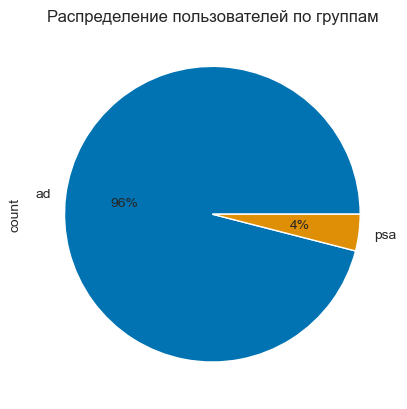

In [7]:
# создаем диаграмму распределения пользователей по группам
sns.set_style("whitegrid") 
sns.set_palette('colorblind') # стиль всех графиков проекта
fig = (
    groups_table.plot(y='count',kind='pie',labels = groups, title='Распределение пользователей по группам',
                     autopct='%.0f%%', legend=False)
)
plt.show()

**Выводы**
- В данных отстутствуют пропуски и дубликаты, все пользователи уникальны.
- 96% пользователей входят в экспериментальную группу, и всего 4% - контрольная группа. Однако, равномерное распределение пользователей не так важно, как минимальный размер группы. Минимальный размер группы рассчитывается до проведения теста. Для этих расчетов необходимо знать значение базовой конверсии и то, какое минимальное изменение конверсии будет измеряться в анализе результатов теста. К сожалению, у нас нет этих данных. Если в группе psa размер выборки не меньше, чем рассчитанный минимальный размер выборки, то результатам теста можно доверять. 

### Исследовательский анализ

#### Конверсия в зависимости от рекламы

In [8]:
# посмотрели распределение платящих и неплатящих пользователей в зависимости от рекламы
counts = data.groupby(['test_group', 'converted']).size().reset_index(name='count')
counts

,test_group,converted,count
0,ad,False,550154
1,ad,True,14423
2,psa,False,23104
3,psa,True,420


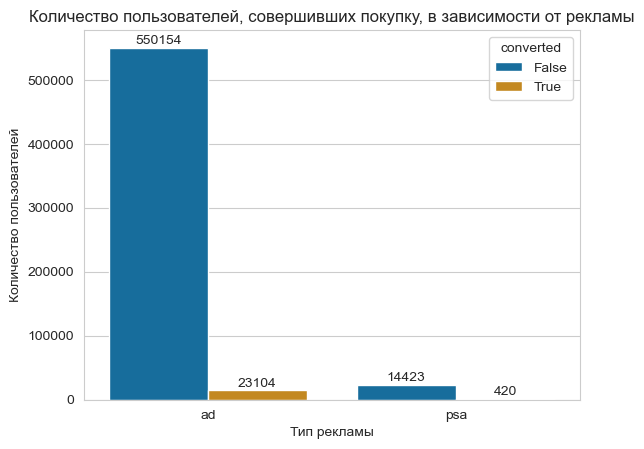

In [9]:
# построили график распределения
ax = sns.countplot(x='test_group', hue='converted', data=data)
# добавили подписи к колонкам
for i, bar in enumerate(ax.containers):
    for j, count in enumerate(bar):
        height = count.get_height()
        ax.annotate(counts.iloc[i*2+j]['count'], xy=(count.get_x() + count.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center')
plt.title('Количество пользователей, совершивших покупку, в зависимости от рекламы')
plt.ylabel('Количество пользователей')
plt.xlabel('Тип рекламы')
plt.show()

In [10]:
cr_ad = counts.loc[1,'count'] / (counts.loc[0,'count'] + counts.loc[1,'count'])
cr_psa = counts.loc[3,'count']/ (counts.loc[2,'count'] + counts.loc[3,'count'])
print(f'Конверсия в покупку в экспериментальной группе: {cr_ad:.5%}')
print(f'Конверсия в покупку в экспериментальной группе: {cr_psa:.5%}')
print(f'Относительный прирост покупок в экспериментальной группы: {(cr_ad-cr_psa)/cr_psa:.5%}')

Конверсия в покупку в экспериментальной группе: 2.55466%
Конверсия в покупку в экспериментальной группе: 1.78541%
Относительный прирост покупок в экспериментальной группы: 43.08506%


Рекламная кампания увеличила конверсию в покупку. Относительный прирост покупок в группе рекламы 43%. Остается только проверить, является ли результат статистически значимым.

#### Количество просмотренных объявлений

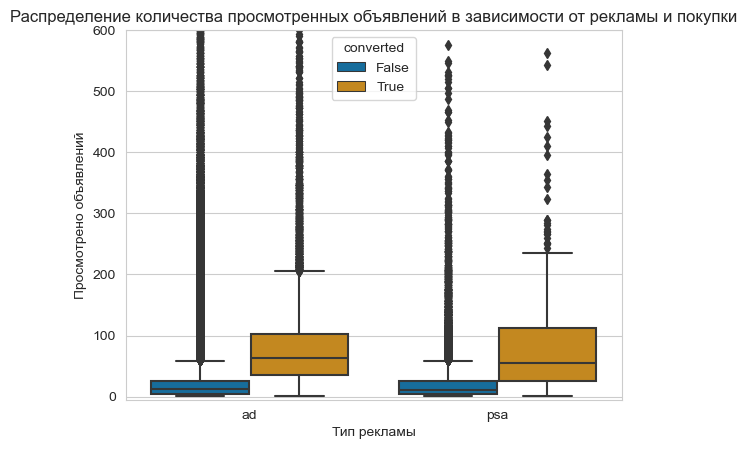

In [11]:
# построили график количества просмотров объявлений
sns.boxplot(x='test_group', y='total_ads', hue='converted', data=data)
plt.title('Распределение количества просмотренных объявлений в зависимости от рекламы и покупки')
plt.xlabel('Тип рекламы')
plt.ylabel("Просмотрено объявлений")
plt.ylim(-5,600)
plt.show()

Вне зависимости от типа рекламы, те пользователи, что совершают покупки, просматривают больше объявлений.

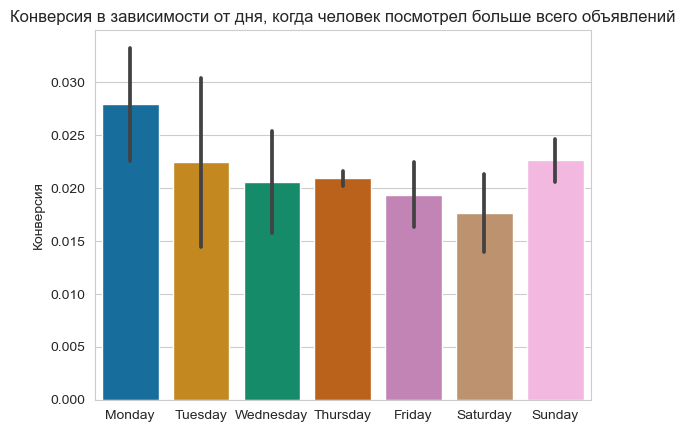

In [12]:
# посчитали конверсию по каждому дню, когда человек просматривал больше всего объявлений, в разрезе групп
conversion_weekday = data.groupby(['most_ads_day', 'test_group'])['converted'].mean().reset_index()
# построили график конверсий
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = sns.barplot(x='most_ads_day', y='converted', data=conversion_weekday, order=order) 
fig.set_title('Конверсия в зависимости от дня, когда человек посмотрел больше всего объявлений')
fig.set_xlabel(None)
fig.set_ylabel('Конверсия')
plt.show()

Общая конверсия выше в понедельник, затем она падает по субботу, и увеличивается в воскресенье.

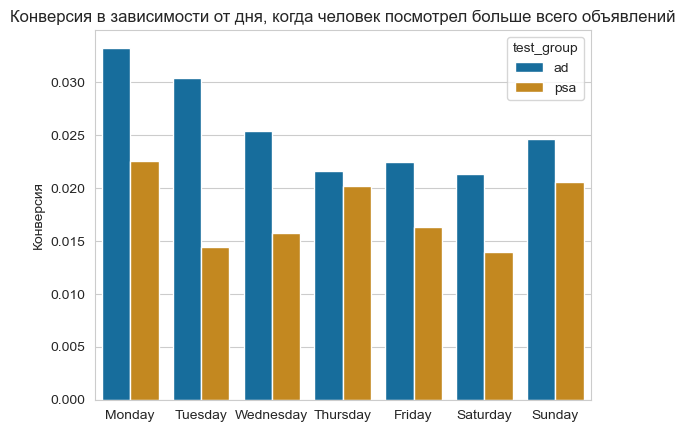

In [13]:
# построили график конверсий в разрезе групп
fig = sns.barplot(x='most_ads_day', y='converted', hue='test_group', data=conversion_weekday, order=order) 
fig.set_title('Конверсия в зависимости от дня, когда человек посмотрел больше всего объявлений')
fig.set_xlabel(None)
fig.set_ylabel('Конверсия')
plt.show()

Вне зависимости от дня недели, в который пользователи были больше всего активны, пользователи, посмотревшие рекламу, имеют большую конверсию в покупку. 

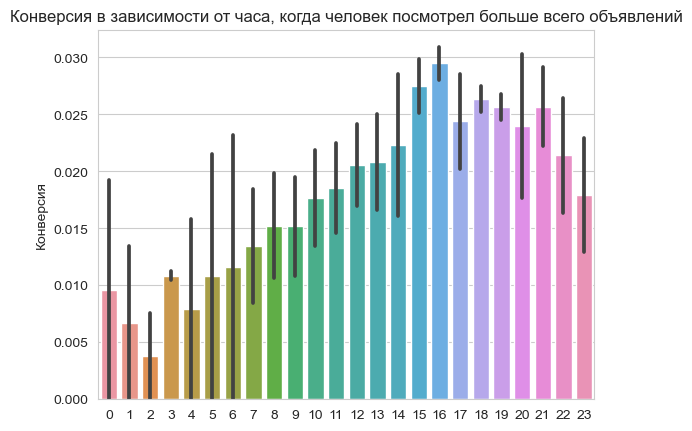

In [14]:
# посчитали конверсию по каждому часу в разрезе групп
conversion_hours = data.groupby(['most_ads_hour', 'test_group'])['converted'].mean().reset_index()
# построили общий график конверсий
fig = sns.barplot(x='most_ads_hour', y='converted', data=conversion_hours) 
fig.set_title('Конверсия в зависимости от часа, когда человек посмотрел больше всего объявлений')
fig.set_xlabel(None)
fig.set_ylabel('Конверсия')
plt.show()

В ночные часы общая конверсия ниже, чем в дневные часы. Самая низкая конверсия в 2 часа ночи, затем она растет до пика в 14-15 часов, и опять снижается к ночи.

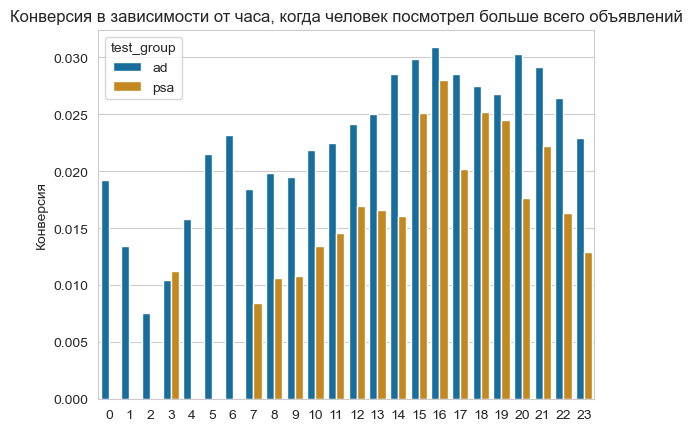

In [15]:
# построили график конверсий в разрезе групп
fig = sns.barplot(x='most_ads_hour', y='converted', hue='test_group', data=conversion_hours) 
fig.set_title('Конверсия в зависимости от часа, когда человек посмотрел больше всего объявлений')
fig.set_xlabel(None)
fig.set_ylabel('Конверсия')
plt.show()

Для ночных часов слишком мало данных по psa, чтобы сделать выводы. Для остальных часов конвесия всегда выше в группе рекламы.

**Выводы**
- Рекламная кампания увеличила конверсию в покупку. Относительный прирост покупок в группе рекламы 43%.
- Вне зависимости от типа рекламы, те пользователи, что совершают покупки, просматривают больше объявлений.
- Общая конверсия выше в понедельник, затем она падает по субботу, и увеличивается в воскресенье.
- В ночные часы общая конверсия ниже, чем в дневные часы. Самая низкая конверсия в 2 часа ночи, затем она растет до пика в 14-15 часов, и опять снижается к ночи.
- Вне зависимости от дня недели и часа, в который пользователи были больше всего активны, пользователи, посмотревшие рекламу, имеют большую конверсию в покупку.

### Статистический анализ

In [16]:
# создали функцию для проверки гипотез о равнестве долей
def z_function(purchases, nobs, alpha):
    # проверка z-критерием
    stat, pval = proportions_ztest(purchases, nobs)
    print(purchases)
    print(nobs)
    print('p-value:', pval)
    if pval < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
    # создание массива значений для оси x
    x = np.linspace(-10, 10, 100)
    # вычисление значения плотности вероятности для каждого значения x
    pdf = norm.pdf(x)
    # создание графика с плотностью вероятности нормального распределения
    plt.plot(x, pdf, color='blue', label='Normal Distribution')
    # отображение p-value на графике
    plt.axvline(x=norm.ppf(1-pval), color='red', label='p-value')
    plt.axvline(x=norm.ppf(1-alpha), color='green', linestyle='--', label='1-alpha')
    plt.axvline(x=norm.ppf(alpha), color='green', linestyle='--', label='alpha')
    plt.ylabel('Плотность вероятности')
    plt.title('P-значение результатов теста')
    plt.legend()
    plt.show()

Сформируем нулевую и альтернативную гипотезы:

```H0: конверсии в покупку в обеих группах равны```

```H1: конверсии в покупку в обеих группах не равны```

Для проверки гипотез можно использовать t-критерий Стьюдента или z-критерий для проверки гипотезы о равенстве генеральных долей. Остановимся на последнем.

[14423   420]
[564577  23524]
p-value: 1.7052807161559727e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница


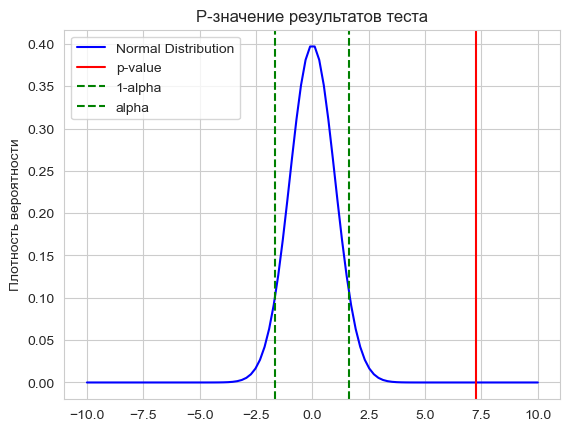

In [17]:
# установим уровень значимости
alpha = 0.05
purchases = np.array([counts.loc[1,'count'], counts.loc[3,'count']])
nobs = np.array([counts.loc[0,'count'] + counts.loc[1,'count'], counts.loc[2,'count'] + counts.loc[3,'count']])
# вызовем функцию для проверки гипотез о равенстве долей
z_function(purchases, nobs, alpha)

**Вывод**

P-value, то есть вероятность получить такое значение при условии, что доли равны, слишком мала (намного меньше принятого уровня значимости). Есть основание отвергнуть нулевую гипотезу. Значит, **рекламная кампания действительно увеличивает конверсию в покупку на 43% относительно социальной рекламы**.

### Общий вывод

- 96% пользователей входят в экспериментальную группу, и всего 4% - контрольная группа. Однако, равномерное распределение пользователей не так важно, как минимальный размер группы. Минимальный размер группы рассчитывается до проведения теста. Для этих расчетов необходимо знать значение базовой конверсии и то, какое минимальное изменение конверсии будет измеряться в анализе результатов теста. К сожалению, у нас нет этих данных. Если в группе psa размер выборки не меньше, чем рассчитанный минимальный размер выборки, то результатам теста можно доверять.
- Рекламная кампания увеличила конверсию в покупку. Относительный прирост покупок в группе рекламы 43%. И этот результат статистически значим.
- Пользователи, которые совершают покупки, просматривают больше объявлений.
- Конверсия выше в понедельник, затем она падает по субботу, и увеличивается в воскресенье. В ночные часы конверсия ниже, чем в дневные часы. Самая низкая конверсия в 2 часа ночи, затем она растет до пика в 14-15 часов, и опять снижается к ночи.
- Вне зависимости от дня недели и часа, в который пользователи были больше всего активны, пользователи, посмотревшие рекламу, имеют большую конверсию в покупку.